In [5]:
import pandas as pd
import numpy as np

In [6]:
df1 = pd.read_csv('../small1/labeled.csv')
# df2 = pd.read_csv('../small2/labeled.csv')
df3 = pd.read_csv('../small3/labeled.csv')

In [7]:
df = pd.concat([df1, 
                # df2, 
                df3])
df.shape

(52242, 4)

In [8]:
df.head()

,title,is_clickbait,text,dataset
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,fake-news
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,Ever get the feeling your life circles the rou...,fake-news
2,Why the Truth Might Get You Fired,1,"Why the Truth Might Get You Fired October 29, ...",fake-news
3,15 Civilians Killed In Single US Airstrike Hav...,1,Videos 15 Civilians Killed In Single US Airstr...,fake-news
4,Iranian woman jailed for fictional unpublished...,1,Print \nAn Iranian woman has been sentenced to...,fake-news


In [9]:
# drop empty titles
df = df[df['title'].notna()]

In [10]:
df['dataset'].value_counts()

dataset
clickbait-dataset    32000
fake-news            20242
Name: count, dtype: int64

In [11]:
duplicate_rows = df[df.duplicated(subset='title', keep=False)]
duplicate_rows.shape

(808, 4)

In [12]:
grouped_dups = duplicate_rows.groupby('title').agg({'is_clickbait': 'unique'}).reset_index()
grouped_dups

,title,is_clickbait
0,"""Top Five Clinton Donors Are Jewish"" - How Ant...",[1]
1,'Grand slam!' Father-son film is smash hit for...,[1]
2,11 Things To Let Go Of Before The New Year,[1]
3,115 Million Americans Killed In 30 Minutes,[1]
4,"14 Days to Do 14 Things, If Hillary’s Indicted...",[1]
...,...,...
364,"“If Trump Loses, I’m Grabbing My Musket”: Form...",[1]
365,“Nothing Good Can Come of This Election”–and T...,[1]
366,“Rigged To Deny Trump”: Are They Stealing Thes...,[1]
367,“They Got In There And Totally Took It Over” –...,[1]


In [13]:
grouped_dups['is_clickbait_is_same'] = grouped_dups['is_clickbait'].apply(lambda x: len(x) == 1)
grouped_dups['is_clickbait_is_same'].value_counts()

is_clickbait_is_same
True    369
Name: count, dtype: int64

In [14]:
grouped_dups['is_clickbait_is_same'].value_counts(normalize=True)

is_clickbait_is_same
True    1.0
Name: proportion, dtype: float64

In [15]:
# drop articles with conflicting labels
df = df[~df['title'].isin(grouped_dups[grouped_dups['is_clickbait_is_same'] == False]['title'])]
df.shape

(52242, 4)

In [16]:
# drop duplicate titles
df = df.drop_duplicates(subset='title')
df.shape

(51803, 4)

In [17]:
df['dataset'].value_counts()

dataset
clickbait-dataset    32000
fake-news            19803
Name: count, dtype: int64

In [18]:
df = df.reset_index(drop=True)
df

,title,is_clickbait,text,dataset
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,fake-news
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,Ever get the feeling your life circles the rou...,fake-news
2,Why the Truth Might Get You Fired,1,"Why the Truth Might Get You Fired October 29, ...",fake-news
3,15 Civilians Killed In Single US Airstrike Hav...,1,Videos 15 Civilians Killed In Single US Airstr...,fake-news
4,Iranian woman jailed for fictional unpublished...,1,Print \nAn Iranian woman has been sentenced to...,fake-news
...,...,...,...,...
51798,"To Make Female Hearts Flutter in Iraq, Throw a...",0,NaN,clickbait-dataset
51799,"British Liberal Democrat Patsy Calton, 56, die...",0,NaN,clickbait-dataset
51800,Drone smartphone app to help heart attack vict...,0,NaN,clickbait-dataset
51801,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,NaN,clickbait-dataset


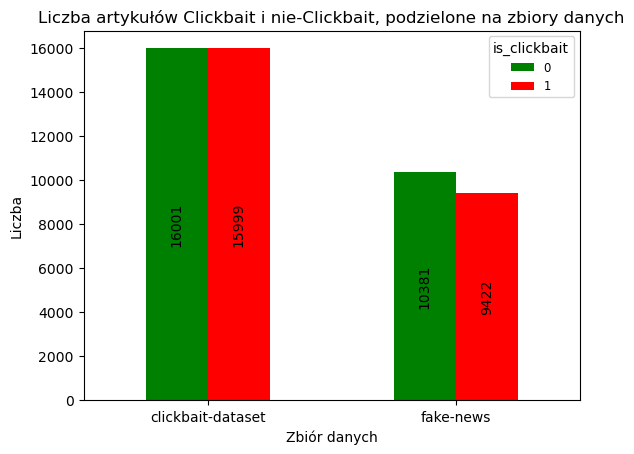

In [19]:
import matplotlib.pyplot as plt
grouped = df.groupby(['dataset', 'is_clickbait']).size().unstack()
# Plot the grouped data
ax = grouped.plot(kind='bar', stacked=False, color=['green', 'red'])

# Set the plot title and labels
plt.title('Liczba artykułów Clickbait i nie-Clickbait, podzielone na zbiory danych')
plt.ylabel('Liczba')
plt.xlabel('Zbiór danych')

# Make the legend smaller
ax.legend(fontsize='small', title='is_clickbait', title_fontsize='10')

# Add text to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() / 2), ha='center', va='center', rotation=90)

# Wrap the x-axis labels if they are too long
plt.xticks(rotation=0, ha='center', wrap=True)

# Show the plot
plt.show()


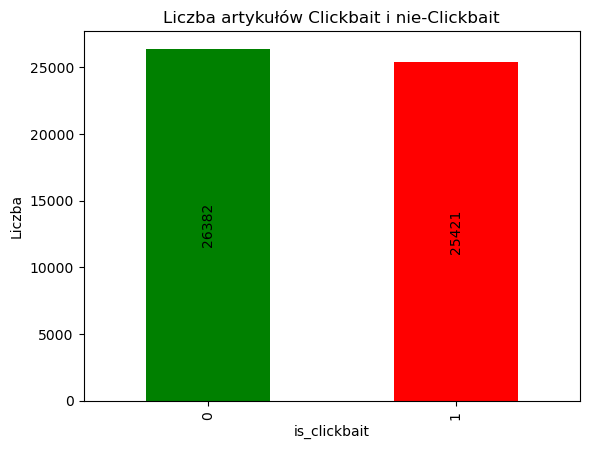

In [20]:
# Plot the value counts of is_clickbait
ax = df['is_clickbait'].value_counts().plot(kind='bar', color=['green', 'red'])

# Set the plot title and labels
plt.title('Liczba artykułów Clickbait i nie-Clickbait')
plt.xlabel('is_clickbait')
plt.ylabel('Liczba')

# Add text to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() / 2), ha='center', va='center', rotation=90)

# Show the plot
plt.show()


In [21]:
temp = df.groupby('title').agg({'is_clickbait': 'unique'}).reset_index()
temp['is_clickbait'].value_counts()

is_clickbait
[0]    26382
[1]    25421
Name: count, dtype: int64

In [22]:
val

NameError: name 'val' is not defined

In [ ]:
# assign train and test sets stratified by is_clickbait

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42, test_size=0.1, stratify=df['is_clickbait'])
test, val = train_test_split(test, random_state=42, test_size=0.5, stratify=test['is_clickbait'])
val1, val2 = train_test_split(val, random_state=42, test_size=0.5, stratify=val['is_clickbait'])

train['sample'] = 'train'
test['sample'] = 'test'
val1['sample'] = 'val1'
val2['sample'] = 'val2'

df = pd.concat([train, test, val1, val2])

In [24]:
# df.to_csv('../../modelling/data/merged_titles_labels_train_test_val12_new.csv', index=False)

In [27]:
df['len_title'] = df['title'].apply(lambda x: len(x.split()))

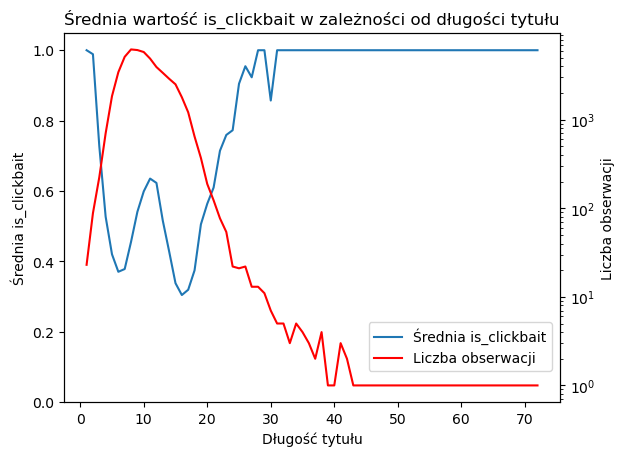

In [31]:
fig, ax1 = plt.subplots()

# plot the average is_clickbait
avg_line, = ax1.plot(df.groupby('len_title').agg({'is_clickbait': 'mean'}), label='Średnia is_clickbait')
ax1.set_xlabel('Długość tytułu')
ax1.set_ylabel('Średnia is_clickbait')
ax1.set_title('Średnia wartość is_clickbait w zależności od długości tytułu')

ax2 = ax1.twinx()

# plot the count (logarithmic scale)
count_line, = ax2.plot(df.groupby('len_title').agg({'is_clickbait': 'count'}).index, df.groupby('len_title').agg({'is_clickbait': 'count'}), color='red', label='Liczba obserwacji')
ax2.set_yscale('log')
ax2.set_ylabel('Liczba obserwacji')
ax2.grid(False)

# Combine the legends
lines = [avg_line, count_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, bbox_to_anchor=(0.6, .15), loc='center left')

# make ax1 from 0 to 1
ax1.set_ylim([0, 1.05])

plt.show()


In [34]:
# check percentage of clickbait for titles with length over 30
df[df['len_title'] > 35]['is_clickbait'].count()

21